In [1]:
import numpy as np
import pandas as pd
#from sklearn.
#参考博客 https://blog.csdn.net/chuan403082010/article/details/85204427

In [57]:
data=pd.read_csv('./20220310资料/household_power_consumption.csv',sep=';',nrows=10000) #数据量有点大，这里只取10000条

In [58]:
data.shape

(10000, 9)

In [59]:
data.head()
# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [61]:
data.info()#数据量很大的时候，不会显示Non，只显示dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   10000 non-null  object 
 1   Time                   10000 non-null  object 
 2   Global_active_power    10000 non-null  object 
 3   Global_reactive_power  10000 non-null  object 
 4   Voltage                10000 non-null  object 
 5   Global_intensity       10000 non-null  object 
 6   Sub_metering_1         10000 non-null  object 
 7   Sub_metering_2         10000 non-null  object 
 8   Sub_metering_3         9998 non-null   float64
dtypes: float64(1), object(8)
memory usage: 703.2+ KB


In [62]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           2
dtype: int64

In [63]:
data.duplicated().sum()

0

In [64]:
#data['Global_active_power']=data['Global_active_power'].astype('float')
#转换类型时，发现Global_active_power种有?，为缺失值 
data[data['Global_active_power']=='?'].shape
data.replace('?',np.nan,inplace=True) 

In [65]:
data.describe()

,Sub_metering_3
count,9998.000000
mean,8.242849
std,8.735647
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


#### 转换数据类型

In [66]:
col=['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
for c in col:
    data[c]=data[c].astype('float')

In [67]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,1.744016,0.118801,241.085660,7.376535,0.885277,2.079816,8.242849
std,1.339906,0.111449,3.673675,5.644862,5.480215,7.675109,8.735647
min,0.194000,0.000000,228.910000,0.800000,0.000000,0.000000,0.000000
25%,0.388000,0.000000,238.500000,1.800000,0.000000,0.000000,0.000000
50%,1.478000,0.100000,241.550000,6.200000,0.000000,0.000000,0.000000
75%,2.561500,0.178000,243.920000,10.800000,0.000000,1.000000,17.000000
max,7.884000,0.724000,249.480000,34.200000,40.000000,73.000000,20.000000


In [68]:
data['Global_active_power'].quantile([0,0.25,0.5,0.75,0.9,1])

0.00    0.1940
0.25    0.3880
0.50    1.4780
0.75    2.5615
0.90    3.6120
1.00    7.8840
Name: Global_active_power, dtype: float64

In [69]:
corr_df=data.corr()

In [70]:
corr_df['Global_intensity'].sort_values(ascending=False)

Global_intensity         1.000000
Global_active_power      0.998643
Sub_metering_3           0.538213
Sub_metering_1           0.314439
Sub_metering_2           0.309991
Global_reactive_power    0.230693
Voltage                 -0.720752
Name: Global_intensity, dtype: float64

In [30]:
data.dropna(axis=0,how='any',inplace=True) #只要有一个数值为空，就删除这一行

In [31]:
corr_df.index

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
##划分训练集测试集
x_train,x_test,y_train,y_test=train_test_split(data['Global_active_power'],data['Global_intensity'],test_size=0.3,random_state=0)

In [34]:
x_train.values

array([1.866, 1.372, 1.636, ..., 0.494, 0.262, 0.378])

In [38]:
#标准化
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()
x_train_sca=scaler.fit_transform(x_train.values.reshape(-1,1))
x_test_sca=scaler.transform(x_test.values.reshape(-1,1))
lr=LinearRegression()
lr.fit(x_train_sca,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pre=lr.predict(x_test_sca)

In [49]:
lr.score(x_train_sca,y_train)

0.9977807251529253

In [50]:
lr.score(x_test_sca,y_test)

0.9977730748868628

In [53]:
lr.coef_

array([4.44161678])

In [54]:
lr._interecept

AttributeError: 'LinearRegression' object has no attribute '_interecept'

In [55]:
import seaborn as sns

KeyboardInterrupt: 

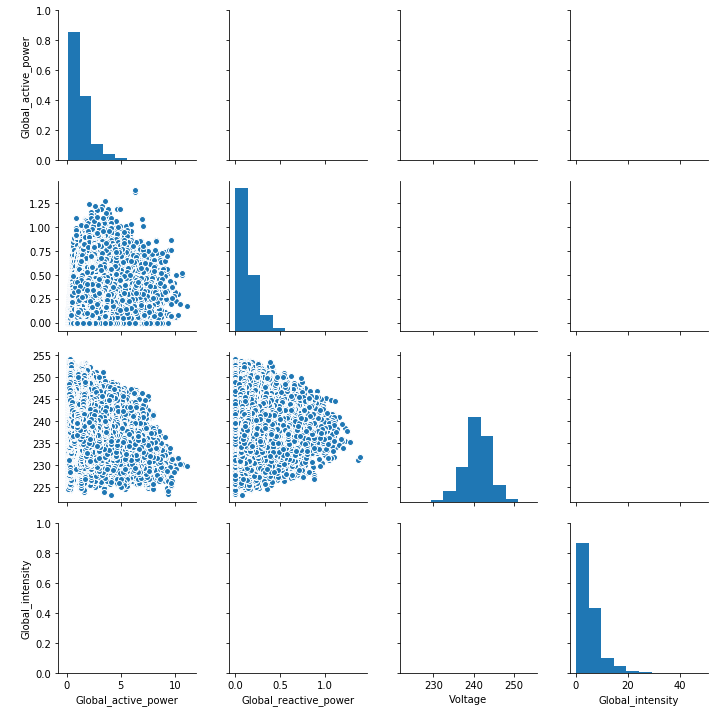

In [56]:
#sns.pairplot(data,vars=['Global_active_power', 'Global_reactive_power', 'Voltage',
      # 'Global_intensity'])